### Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel

### Load the dataset

In [ ]:
data = pd.read_csv('CarPrice_Assignment.csv')

In [ ]:
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  carbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,carbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
carbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

### Feature Extraction using PCA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('CarPrice_Assignment.csv')

# Select numerical columns
numeric_columns = data.select_dtypes(include=['int', 'float']).columns
X_numeric = data[numeric_columns]

# Drop rows with missing values
X_numeric.dropna(inplace=True)

# Standardize the features
X_numeric_scaled = (X_numeric - X_numeric.mean()) / X_numeric.std()

# Compute the covariance matrix
cov_matrix = np.cov(X_numeric_scaled, rowvar=False)

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvalues and eigenvectors
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Set the number of top principal components to retain
n_components = 5  # Change this value to the desired number of components

# Select the top n_components eigenvectors
selected_eigenvectors = sorted_eigenvectors[:, :n_components]

# Calculate explained variance ratio
explained_variance_ratio = sorted_eigenvalues / np.sum(sorted_eigenvalues)

# Print the PCA values
# print("PCA values:")
# for i in range(n_components):
#    print(f"PCA {i+1}: {selected_eigenvectors[:, i]}")

# Create a DataFrame to store PCA values with column names
pca_values_df = pd.DataFrame(selected_eigenvectors, columns=[f'PCA_{i+1}' for i in range(n_components)], index=X_numeric.columns)

# Print the DataFrame with PCA values
print("PCA values with column names:")
print(pca_values_df)


PCA values with column names:
                     PCA_1     PCA_2     PCA_3     PCA_4     PCA_5
car_ID            0.031230 -0.226567 -0.447162 -0.480897  0.570477
symboling        -0.092185  0.383445  0.154142 -0.426712  0.042360
wheelbase         0.292552 -0.272848  0.000049  0.223108  0.020925
carlength         0.331183 -0.148208 -0.048867  0.092694  0.076199
carwidth          0.326830 -0.060042  0.110093  0.023243 -0.004613
carheight         0.114085 -0.420991 -0.240608  0.313180  0.012429
carbweight        0.353937 -0.025408  0.071478 -0.036890 -0.020830
enginesize        0.317460  0.085125  0.186033 -0.140993 -0.133074
boreratio         0.262600 -0.000524 -0.211353 -0.336528  0.016209
stroke            0.051484 -0.030343  0.626964  0.148700  0.691693
compressionratio  0.019747 -0.395863  0.378209 -0.312123 -0.114721
horsepower        0.289894  0.288960  0.008540 -0.110466  0.010151
peakrpm          -0.081912  0.388266 -0.141554  0.377327  0.241795
citympg          -0.299739 -0.26

<ipython-input-23-1d1a60cfea67>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_numeric.dropna(inplace=True)


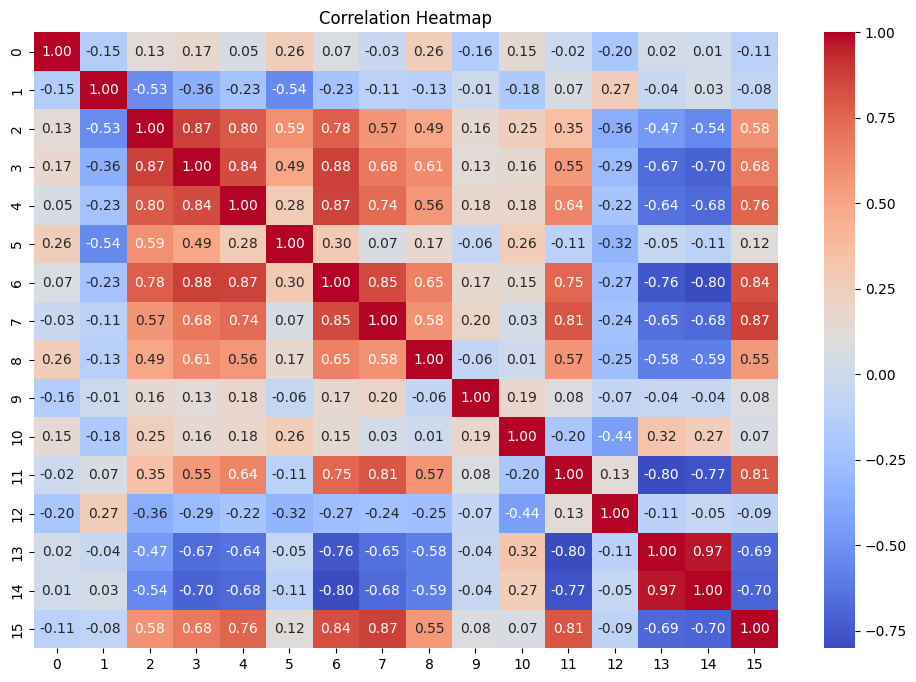

In [ ]:
# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

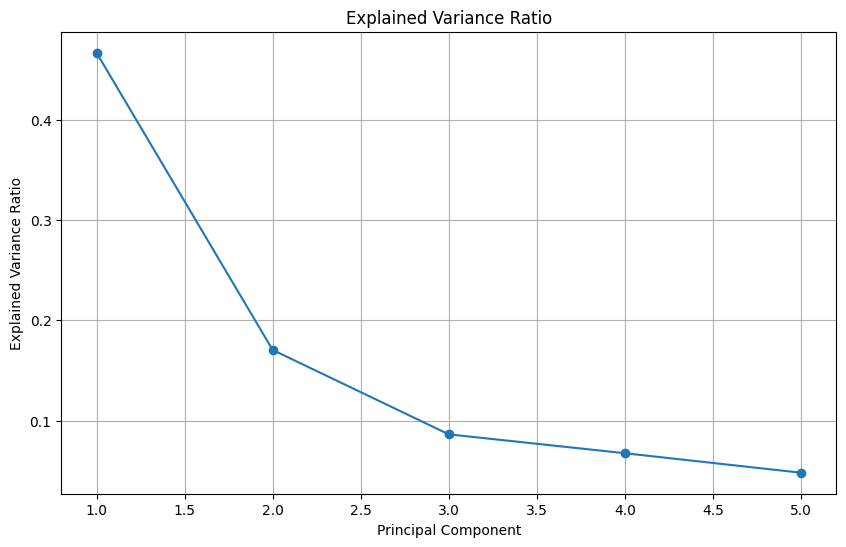

In [ ]:
# Visualize explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_components + 1), explained_variance_ratio[:n_components], marker='o', linestyle='-')
plt.title('Explained Variance Ratio')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

- The "Explained Variance Ratio" graph illustrates how much of the total variance in the dataset each principal component explains. Each point on the graph represents a principal component, with the x-axis indicating the principal component number and the y-axis indicating the proportion of variance explained. This graph helps us understand the contribution of each principal component to the overall variance in the data.

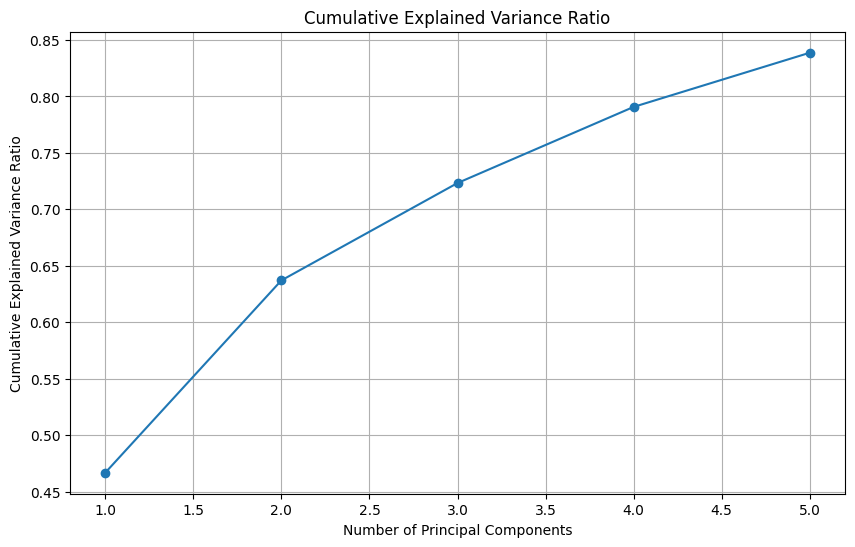

In [ ]:
# Optional: Visualize the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_components + 1), cumulative_variance_ratio[:n_components], marker='o', linestyle='-')
plt.title('Cumulative Explained Variance Ratio')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()



- On the other hand, the "Cumulative Explained Variance Ratio" graph shows the cumulative proportion of variance explained by including a certain number of principal components. It plots the cumulative explained variance up to each principal component, allowing us to see how much of the total variance is captured by adding more principal components. This graph helps us make decisions about how many principal components to retain based on the desired level of explained variance.




In [ ]:
print(data.columns)

# Step 3: Preprocess the data
# Check if target column exists
target_column = 'price'  # Assuming 'price' is the target column
if target_column not in data.columns:
    print(f"Error: '{target_column}' not found in the dataset.")
    exit()

# Separate numerical and categorical features
numerical_features = data.select_dtypes(include=[np.number])
categorical_features = data.select_dtypes(include=[object])

# Ensure 'price' column is included in numerical features
if target_column not in numerical_features.columns:
    numerical_features[target_column] = data[target_column]

# Split into X and y
X = numerical_features.drop(columns=[target_column])  # Features
y = numerical_features[target_column]  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Perform Lasso Regression
# Initialize and fit the Lasso regression model
lasso = LassoCV(cv=5)  # LassoCV automatically performs cross-validation
lasso.fit(X_train, y_train)

# Step 5: Select features
selected_features = SelectFromModel(lasso, prefit=True).get_support()
selected_feature_names = X.columns[selected_features]

# Print selected feature names
print("Selected features:")
print(selected_feature_names)


Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'carbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')
Selected features:
Index(['car_ID', 'carbweight', 'enginesize', 'horsepower', 'peakrpm'], dtype='object')


In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('CarPrice_Assignment.csv')

# Step 1: Prepare the data
# Assuming 'price' is the target column
target_column = 'price'

# Separate numerical features and target variable
numerical_features = data.select_dtypes(include=[np.number])
X = numerical_features.drop(columns=[target_column])
y = numerical_features[target_column]

# Step 2: Split the data into training and testing sets (if needed)
# You can skip this step if you have a different approach for validation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize beta (coefficients) with zeros or random values
num_features = X_train.shape[1]
beta = np.zeros(num_features)

# Step 4: Define the Lasso loss function
def lasso_loss(X, y, beta, alpha):
    m = len(y)
    y_pred = np.dot(X, beta)
    loss = np.sum((y_pred - y) ** 2) + alpha * np.sum(np.abs(beta))
    return loss / (2 * m)

# Step 5: Implement gradient descent to minimize the loss function
def lasso_gradient_descent(X, y, beta, alpha, learning_rate, iterations):
    m = len(y)
    loss_history = []

    for i in range(iterations):
        y_pred = np.dot(X, beta)
        error = y_pred - y
        gradient = np.dot(X.T, error) + alpha * np.sign(beta)
        beta -= (learning_rate / m) * gradient
        loss = lasso_loss(X, y, beta, alpha)
        loss_history.append(loss)

    return beta, loss_history

# Step 6: Set hyperparameters (alpha, learning_rate, iterations)
alpha = 0.1  # L1 regularization parameter
learning_rate = 0.01
iterations = 1000

# Step 7: Perform Lasso gradient descent
beta_final, _ = lasso_gradient_descent(X_train.values, y_train.values, beta, alpha, learning_rate, iterations)

# Step 8: Select features based on non-zero coefficients
selected_features_indices = np.where(beta_final != 0)[0]
selected_features = X_train.columns[selected_features_indices]

# Print selected feature names
print("Selected features:")
print(selected_features)


Selected features:
Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'carbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-21-2dfc1985a6a1>:29: RuntimeWarning: overflow encountered in square
  loss = np.sum((y_pred - y) ** 2) + alpha * np.sum(np.abs(beta))
